In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [52]:
# %matplotlib inline

In [53]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

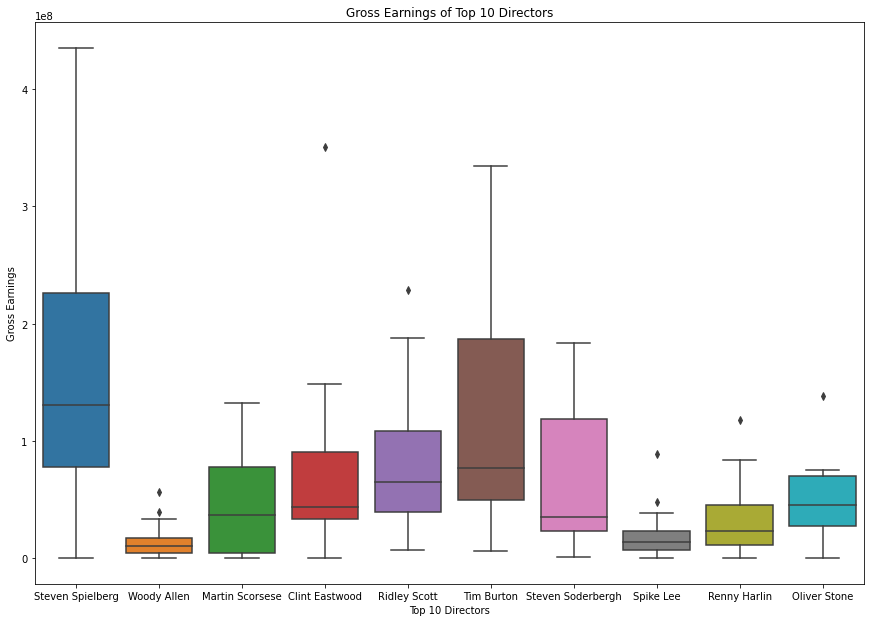

In [54]:
from collections import Counter, OrderedDict

###get the ordered list of directors with most movies directed(descending order)
directors_ = OrderedDict(Counter(data["director_name"]).most_common())

# var called
counter = 1
### count halted at index = 11 due to movies with no directors (if a moment theres no blank directors, create a cond statement to halt at index=10(stop=11)##
stop = 12

top_directors = []
### Included only the top 10 names in the dictionary(keys) from directors_(li 4)
for i in directors_:
    if i in top_directors:
        break
    else:
        top_directors.append(i)
        counter += 1;
        if counter==stop:
            break;
### got the top 10 directors based on most movies directed            
#excluded the 0 or unknown director            
top10_ = np.append(np.array([]), top_directors)[1:]

dict_gross_ = {}
###utilized dictionary to store gross values of each top10 directors (key:director_name,value=gross_values_of_each_their_movies)
###to do that:
for director in top10_:

#got all movies directed by our director
    directors_movies_ = data[data.director_name == director]
#got the gross column with director_name == our current director(ex. steven spielberg)
    all_gross_of_director_ = directors_movies_[['gross']]
#stored key,value to dictionary for graphing purposes
    dict_gross_[director] = all_gross_of_director_
###the rest here was plotting the boxplot with the use of the dictionary dict_gross_
boxplotData_ = []
for i in dict_gross_: 
    boxplotData_.append(dict_gross_[i])
    
boxplot_=sns.boxplot(data=boxplotData_)

boxplot_.set_xticklabels([f'{i}' for i in dict_gross_])

boxplot_.get_figure().subplots_adjust(left=0.08, right=2, bottom=0.05, top=2,
                    hspace=5, wspace=5)    

plt.xlabel('Top 10 Directors')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings of Top 10 Directors')

plt.show()

## Plot the following variables in one graph:


- num_critic_for_reviews
- IMDB score
- gross

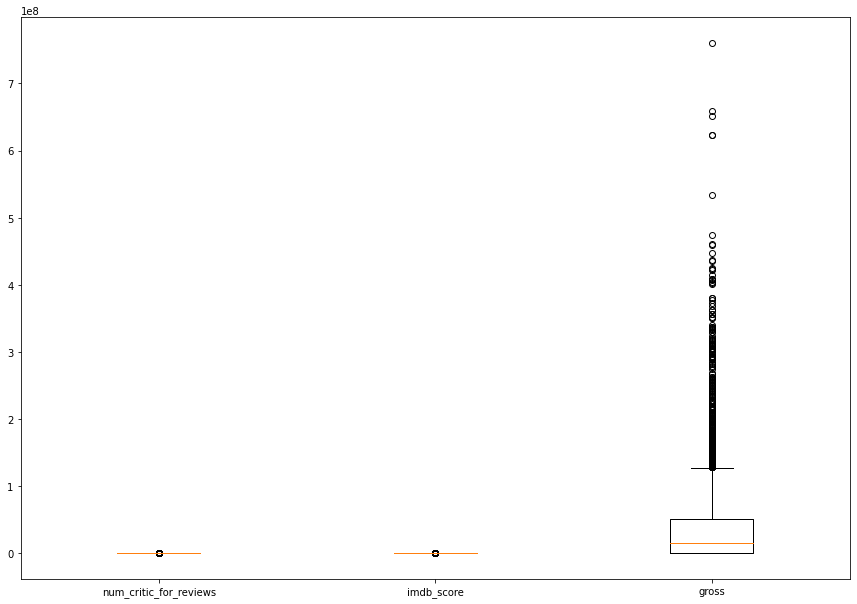

In [55]:
variables_ = ['num_critic_for_reviews', 'imdb_score', 'gross']

#stored column's values to a dictionary
var_dict_ = {}
for column in variables_:
    current_column_ = data[column]
    var_dict_[column] = current_column_

fig, graph_ = plt.subplots()
### input values under each column to a boxplot
graph_.boxplot([var_dict_['num_critic_for_reviews'], var_dict_['imdb_score'], var_dict_['gross']])
### adjusted the graph for a bit of visual comprehension
graph_.get_figure().subplots_adjust(left=0.08, right=2, bottom=0.05, top=2,
                    hspace=5, wspace=5)    

graph_.set_xticklabels(['num_critic_for_reviews', 'imdb_score','gross'])
plt.show;


## Compute Sales (Gross - Budget), add it as another column

In [56]:
###esentially copied dataFrame
cleaned_data = data.copy()
###added new sales column
cleaned_data['sales'] = (data['gross'] - data['budget'])
cleaned_data[['gross','budget','sales']]


,gross,budget,sales
0,760505847.0,237000000.0,523505847.0
1,309404152.0,300000000.0,9404152.0
2,200074175.0,245000000.0,-44925825.0
3,448130642.0,250000000.0,198130642.0
4,0.0,0.0,0.0
...,...,...,...
5039,0.0,0.0,0.0
5040,0.0,1400.0,-1400.0
5041,10443.0,0.0,10443.0
5042,85222.0,1100.0,84122.0


## Which directors garnered the most total sales?

In [57]:
### the way I understood the question, get the sum of all sales the movies directed by that director and 
### make that the basis for determining the directors who got most total sales
### SO...
### I did make a function for getting sum in the array(specifically, the sales from movies)
def sum_(arr):
    _sum = 0
    for i in arr: 
        _sum += i
    return(_sum)
### stored all the movies sales under each director
directors_and_sales_ = {}
### Each director
for director in cleaned_data['director_name']:
    ### got the sales column with the director_name
    data_ = cleaned_data[cleaned_data.director_name == director]
    sales_by_director_ = data_['sales']
    ### key: director, value : sales_by_director
    directors_and_sales_[director] = sales_by_director_
### then, got the sums of sale_by_director by:
directors_and_total_sales_ = {}
for director in directors_and_sales_: 
    ###putting sales to an array and call sum_ function with the array as parameter
    array_sales_ = directors_and_sales_[director]
    total_sales_ = sum_(array_sales_)
    ### stored total sales under directors_name, respectively
    directors_and_total_sales_[director] = total_sales_
### did the Sort to get the directors with highest total sales
sorted_directors_and_total_sales_ = sorted(directors_and_total_sales_.items(), key=operator.itemgetter(1),reverse=True)

### I did get the TOP 10 ONLY and print out the output
counter2_ = 0
stopper = 10
top_directors_most_sale_ = []
for i in sorted_directors_and_total_sales_:
    if i in top_directors_most_sale_:
        break
    else:
        top_directors_most_sale_.append(i)
        counter2_ += 1;
        if counter2_==stopper:
            break;
print("Top 10 Directors who garnered the most total sales")
for director in top_directors_most_sale_:
    print(director)



Top 10 Directors who garnered the most total sales
('Steven Spielberg', 2451332231.0)
('George Lucas', 1386641480.0)
('James Cameron', 1199625910.0)
('Joss Whedon', 1000886628.0)
('Chris Columbus', 941707624.0)
('Peter Jackson', 900969279.0)
('Tim Burton', 824275480.0)
('Christopher Nolan', 808227576.0)
('Jon Favreau', 769381547.0)
('Francis Lawrence', 755501971.0)


## Plot sales and average likes as a scatterplot. Fit it with a line.

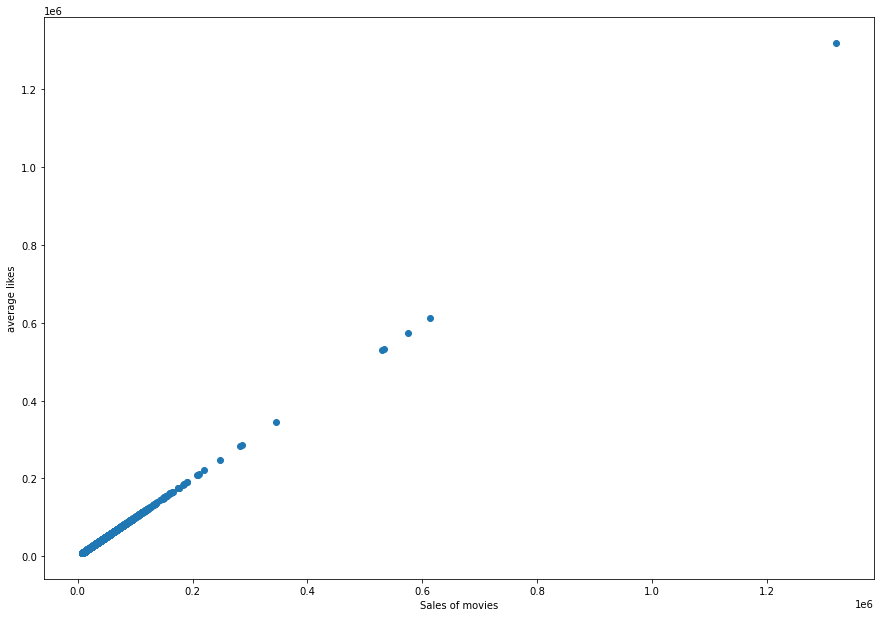

In [58]:
sales_and_ave_likes_ = {}
### To my understanding of the statement, plot the sales and average likes. So... 
### got the average of columns with concerns to 'likes'
sales_and_avglikes_variable_ = ['sales','avg_likes']
### created the new avg_likes column with the average value of concerning 'likes' columns
cleaned_data['avg_likes'] = (cleaned_data['director_facebook_likes']+cleaned_data['actor_3_facebook_likes']+cleaned_data['actor_1_facebook_likes']
                             +cleaned_data['cast_total_facebook_likes']+cleaned_data['actor_2_facebook_likes']+ cleaned_data['movie_facebook_likes'].mean())

sales_and_avglikes_values_ = [cleaned_data['sales'], cleaned_data['avg_likes']]

###Plotted scatterplot 
for var in sales_and_avglikes_variable_:
    for val in sales_and_avglikes_values_:
        sales_and_ave_likes_[var] = val


scatterplot_ = plt.scatter(sales_and_ave_likes_['sales'], sales_and_ave_likes_['avg_likes'])

###did little configuration of the graph visuals
scatterplot_.get_figure().subplots_adjust(left=0.08, right=2, bottom=0.05, top=2,
                    hspace=5, wspace=5)   

plt.xlabel('Sales of movies')
plt.ylabel('average likes')

plt.show;

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

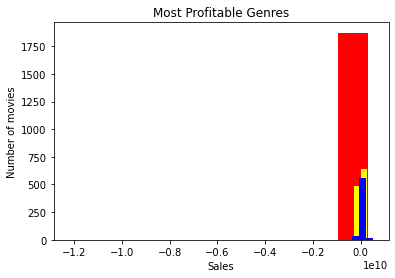

Based on the histogram, the Comedy genre is the most profitable.


In [59]:
### Pseudocode
# create chosen genre variable, genre arrays, and dictionary
# retrieve sales and genre column in dataframe
# split each genre row by |
# append row sales to respective array if a chosen genre is in row genre
# plot histogram with the genre arrays (Romance, Comedy, Action, Fantasy)
chosen_genres_ = ['Romance', 'Comedy', 'Action', 'Fantasy']
genres_data_ = cleaned_data['genres']
sales_data_ = cleaned_data['sales']


sales_ = np.array(sales_data_)
dict_1 = {}
array_romance_ = []
array_comedy_ = []
array_action_ = []
array_fantasy_ = []

counter2_ = 0
for genres in genres_data_:
    #split each genre row by |
    split_ = genres.split('|')
    #checked if chosen genre is in genre row
    #if yes, append row sales to that genre present in genre row
    for chosen_genre in chosen_genres_:
        if chosen_genre in split_:
            if chosen_genre=='Romance':
                array_romance_.append(sales_[counter2_])
            elif chosen_genre =='Comedy':
                array_comedy_.append(sales_[counter2_])
            elif chosen_genre =='Action':
                array_action_.append(sales_[counter2_])
            elif chosen_genre =='Fantasy':
                array_fantasy_.append(sales_[counter2_])
    counter2_ += 1
###plotting of histogram using the genre arrays generated
plt.hist(array_romance_,  color = 'green', label = 'Romance')
plt.hist(array_comedy_, color = 'red', label = 'Comedy')
plt.hist(array_action_, color = 'yellow', label = 'Action')
plt.hist(array_fantasy_, color = 'blue', label = 'Fantasy')

plt.xlabel('Sales')
plt.ylabel('Number of movies')
plt.title('Most Profitable Genres')
plt.show()

print("Based on the histogram, the Comedy genre is the most profitable.")

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [60]:
cleaned_data['average_actor_likes'] = (cleaned_data['actor_1_facebook_likes']+cleaned_data['actor_2_facebook_likes']
                                       +cleaned_data['actor_3_facebook_likes'].mean())
cleaned_data[['average_actor_likes']]


,average_actor_likes
0,2577.940722
1,45641.940722
2,12034.940722
3,50641.940722
4,784.940722
...,...
5039,2075.940722
5040,641.940722
5041,2306.940722
5042,750.940722


## Copying the whole dataframe

In [61]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [62]:
#get min and max 
#use the min-max approach and create new columns in df
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic'] = (df['num_critic_for_reviews'] - min) / (max-min)


In [63]:
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)


In [64]:
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)


In [65]:
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)


In [66]:
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)


In [67]:
max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)


In [68]:
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)


In [69]:
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)


In [70]:
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)


In [71]:
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)


In [72]:
df[['nm_num_critic','nm_duration','nm_director_facebook_likes','nm_actor_3_facebook_likes','nm_actor_1_facebook_likes','nm_budget',
    'nm_actor_2_facebook_likes','nm_imdb_score','nm_aspect_ratio','nm_movie_facebook_likes']]

,nm_num_critic,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_budget,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes
0,0.889299,0.941799,0.000000,0.037174,0.001563,1.940158e-02,0.006832,0.831579,0.111250,0.094556
1,0.371464,0.894180,0.024478,0.043478,0.062500,2.455896e-02,0.036496,0.747368,0.146875,0.000000
2,0.740467,0.783069,0.000000,0.007000,0.017188,2.005649e-02,0.002869,0.715789,0.146875,0.243553
3,1.000000,0.867725,0.956522,1.000000,0.042188,2.046580e-02,0.167883,0.894737,0.146875,0.469914
4,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000e+00,0.000088,0.747368,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5039,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000e+00,0.004328,0.789474,1.000000,0.091691
5040,0.015990,0.402116,0.000000,0.000000,0.000000,1.146085e-07,0.000000,0.663158,0.000000,0.000046
5041,0.017220,0.529101,0.000000,0.021261,0.001478,0.000000e+00,0.005248,0.663158,0.146875,0.001891
5042,0.052891,0.476190,0.000696,0.000696,0.000134,9.004953e-08,0.000168,0.694737,0.115625,0.001307
